# 250225-6-2

## 1. Load

In [2]:
import pickle
import matplotlib.pyplot as plt 

In [3]:
# .pkl 파일에서 불러오기
with open("./data/data.pkl", "rb") as f:
    data_loaded = pickle.load(f)

# 변수 개별 할당
y = data_loaded["y"]
yU = data_loaded["yU"]
yP = data_loaded["yP"]
t = data_loaded["t"]
regions = data_loaded["regions"]

In [4]:
print(regions)

['Bukchoncheon', 'Cheorwon', 'Daegwallyeong', 'Chuncheon', 'Baengnyeongdo', 'Bukgangneung', 'Gangneung', 'Seoul', 'Incheon', 'Wonju', 'Ulleungdo', 'Suwon', 'Seosan', 'Cheongju', 'Daejeon', 'Chupungnyeong', 'Andong', 'Pohang', 'Daegu', 'Jeonju', 'Changwon', 'Gwangju', 'Busan', 'Mokpo', 'Yeouido', 'Heuksando', 'Gochang', 'Hongseong', 'Jeju', 'Gosan', 'Jinju', 'Gochang-gun', 'Yeonggwang-gun', 'Gimhae-si', 'Sunchang-gun', 'Bukchangwon', 'Yangsan-si', 'Boseong-gun', 'Gangjin-gun', 'Uiryeong-gun', 'Hamyang-gun', 'Gwangyang-si', 'Cheongsong-gun', 'Gyeongju-si']


## 2. 모든 일사량 자료를 시각화 

태풍 힌남노는 2022년 9월 4일에 발생하여 9월 7일까지 영향을 미쳤습니다. 주로 한반도와 일본, 중국 근처를 지나면서 강한 바람과 비를 동반했죠. 실제로 한국에서는 많은 피해가 있었고, 특히 경상도 지역에 큰 영향을 미쳤습니다.

<https://namu.wiki/w/%ED%9E%8C%EB%82%A8%EB%85%B8>

Cluster 1: Wonju, Seosan, Cheongju, Hongseong

Cluster 2: Daegwallyeong, Bukgangneung, Gangneung, Ulleungdo

Cluster 3: Bukchoncheon, Cheorwon, Chuncheon, Seoul, Incheon, Suwon

Cluster 4: Baengnyeongdo

Cluster 5: Heuksando, Jeju, Gosan

Cluster 6: Changwon, Busan, Yeouido, Jinju, Gimhae-si, Bukchangwon, Yangsan-si, Uiryeong-gun, Hamyang-gun, Gwangyang-si

Cluster 7: Gwangju, Mokpo, Gochang, Gochang-gun, Yeonggwang-gun, Boseong-gun, Gangjin-gun

Cluster 8: Daejeon, Andong, Jeonju

Cluster 9: Chupungnyeong, Pohang, Daegu, Sunchang-gun, Cheongsong-gun, Gyeongju-si

클러스터 2,3,7,8 에 해당하는 도시들의 인덱스..

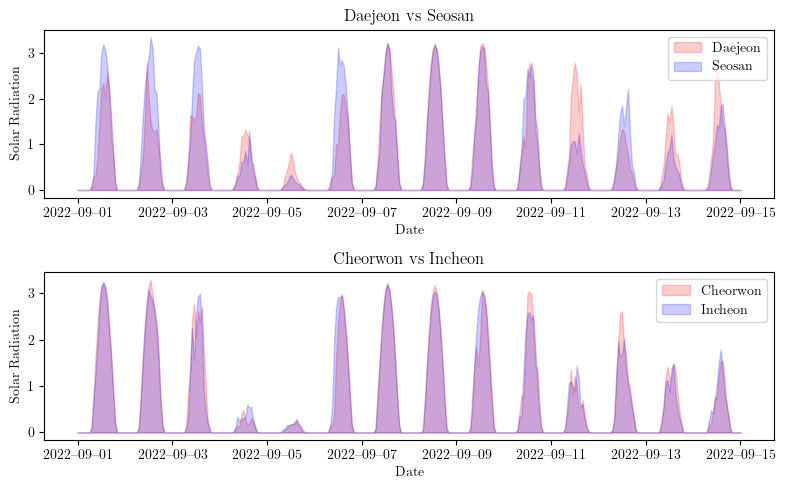

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# LaTeX 스타일 폰트 설정
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif"
})

# 9월 1일부터 9월 15일까지의 데이터 필터링
start_date = "2022-09-01"
end_date = "2022-09-15"
filtered_t = t[(t >= start_date) & (t <= end_date)]
filtered_y = y[(t >= start_date) & (t <= end_date), :]


# 2x1 서브플롯 설정
fig, axes = plt.subplots(2, 1, figsize=(8, 5))

# 첫 번째 플롯: 대전 vs 서산 (투명도 적용 area plot)
axes[0].fill_between(filtered_t, filtered_y[:, regions.index("Daejeon")], color='red', alpha=0.2, label="Daejeon")
axes[0].fill_between(filtered_t, filtered_y[:, regions.index("Seosan")], color='blue', alpha=0.2, label="Seosan")
axes[0].set_title("Daejeon vs Seosan", fontsize=12)
axes[0].set_xlabel("Date", fontsize=10)
axes[0].set_ylabel("Solar Radiation", fontsize=10)
axes[0].xaxis.set_major_formatter(mdates.DateFormatter("%Y–%m–%d"))
axes[0].legend()

# 두 번째 플롯: 철원 vs 인천 (투명도 적용 area plot)
axes[1].fill_between(filtered_t, filtered_y[:, regions.index("Cheorwon")], color='red', alpha=0.2, label="Cheorwon")
axes[1].fill_between(filtered_t, filtered_y[:, regions.index("Incheon")], color='blue', alpha=0.2, label="Incheon")
axes[1].set_title("Cheorwon vs Incheon", fontsize=12)
axes[1].set_xlabel("Date", fontsize=10)
axes[1].set_ylabel("Solar Radiation", fontsize=10)
axes[1].xaxis.set_major_formatter(mdates.DateFormatter("%Y–%m–%d"))
axes[1].legend()

# 배경색 설정 (하얀색)
fig.patch.set_facecolor('white')

# 그래프 레이아웃 조정
plt.tight_layout()

# 저장 경로 설정
save_path = "./figs/daejeon_seosan_cheorwon_incheon_area.pdf"
os.makedirs(os.path.dirname(save_path), exist_ok=True)
plt.savefig(save_path, format="pdf", dpi=300, bbox_inches='tight', facecolor='white')

# 그래프 출력
plt.show()

:::{.callout-note}
아래는 주어진 스토리를 바탕으로 작성한 보고서 초안입니다.

일사량 분석을 위한 STGNN 기반 접근법: 지리적 거리와 특성 유사성 간 관계

1. 서론

기상 데이터 및 태양 복사량(Solar Radiation)과 같은 시계열 자료를 분석할 때, Spatio-Temporal Graph Neural Networks (STGNN) 계열의 모델이 효과적인 방법으로 사용된다. 이러한 모델을 적용하기 위해서는 **노드 간 연결성(Edges)**을 정의해야 하는데, 가장 직관적인 방법은 두 지점 간 거리(Distance)를 기반으로 연결성을 결정하는 것이다. 일반적으로 가까운 지역일수록 기후 특성이 유사하며, 따라서 일사량도 유사할 것이라 예상할 수 있다.

그러나, 단순히 거리만으로 특성 유사성을 결정하는 것은 한계가 있다. 본 연구에서는 거리와 실제 일사량 패턴 간 관계를 비교하여, 지리적 거리가 꼭 특성 유사성을 보장하지 않음을 분석한다.

2. 지리적 거리와 특성 유사성의 관계

일반적으로 기후적 특성이 비슷한 지역들은 지리적으로 가까운 경향을 보인다. 이는 대기 순환, 태양 복사량, 강수량 등의 기후 변수들이 인접한 지역에서 유사한 영향을 받기 때문이다. 하지만, 다음과 같은 이유로 거리가 가깝다고 해서 반드시 유사한 특성을 보이지는 않는다.
	1.	지형적 요인
	•	산맥, 해안선, 강 등은 지역 간 기후 차이를 발생시킬 수 있음.
	•	예를 들어, 같은 위도에 위치한 지역이라도 산맥의 위치에 따라 강수량, 바람, 기온 등이 달라질 수 있음.
	2.	해양과 내륙의 차이
	•	해안과 내륙은 기후 특성이 크게 다름.
	•	해양은 대기 순환의 영향을 크게 받아 온도가 완만하게 변하고, 내륙은 상대적으로 일교차가 큼.
	3.	고도(Elevation)의 영향
	•	동일한 위도, 경도에 위치하더라도 고도가 높은 지역은 태양 복사량 및 기후 특성이 다를 가능성이 큼.

3. 대전-서산 vs 철원-인천: 거리와 기후 유사성 비교

주어진 그림(📎 daejeon_seosan_cheorwon_incheon_area.pdf)은 대전-서산과 철원-인천 두 쌍의 지역에 대한 일사량(Solar Radiation) 시계열 데이터를 비교한 것이다.
	1.	지리적 거리 비교
	•	대전-서산: 약 96.1 km
	•	철원-인천: 약 93.4 km
→ 두 쌍의 지역 간 거리는 대략 유사하며, 대전-서산이 철원-인천보다 약간 더 가깝다.
	2.	일사량 패턴 비교
	•	대전과 서산은 비교적 가까운 지역이지만, 일사량 패턴에서 차이가 나타남.
	•	반면, 철원과 인천은 지리적으로 가깝고, 실제 일사량 패턴도 더 유사함.
	•	이는 지형적 요인(산맥, 고도 차이 등)이 태양 복사량에 영향을 미칠 가능성을 보여준다.

4. 결론: STGNN에서 연결성 정의의 확장 필요성

기존의 STGNN 모델에서는 두 지점 간 거리(Distance)를 연결성 정의의 주요 기준으로 삼는 경우가 많다. 하지만 위 사례에서 볼 수 있듯이, 거리만으로 특성 유사성을 판단하는 것은 한계가 있음.

✔️ 주요 시사점
	1.	거리 기반 연결성 정의의 한계
	•	물리적 거리가 가까워도, 지형, 해양성 기후 등의 요인으로 인해 실제 기후 패턴이 다를 수 있음.
	•	반대로, 거리상으로 멀리 떨어져 있어도, 대기 순환의 영향으로 유사한 기후 패턴을 가질 수 있음.
	2.	확장된 연결성 정의 필요
	•	단순한 거리 기반 그래프가 아닌, 데이터 기반 유사도(시계열 상관 관계 등)를 반영한 그래프 구성이 필요함.
	•	예를 들어, 거리 + 기후적 유사성(상관계수, DTW, 주파수 특성 등)을 함께 고려한 연결성 정의가 보다 정확한 예측 성능을 제공할 수 있음.
	3.	STGNN의 활용 방안
	•	단순 거리 기반 연결성뿐만 아니라, 지역 간 기후적 유사성(Feature Similarity)을 반영한 그래프를 구축하면 STGNN 성능을 더욱 향상시킬 수 있음.
	•	예를 들어, 일사량 패턴이 유사한 지역끼리 가중치를 높이는 방식의 Graph Construction 기법을 적용할 수 있음.
:::